# Candidate number: 10006


## Introduction

In this project we will work with solving undertermined linear systems, where our project contains three separate but closely linked tasks. Generally, we will try to solve a constraint optimization problem in finding $x_{min}$, this by using a range of different methods. This will in the end be applied to a more real-life problem, namely single channel source separation for images. In some settings, we will also compare our developed implementations for finding $x_{min}$, to some of NumPy's own functions. Here, we are both interested in accuracy and runtime of our functions.

## TASK 1 

### 1 a)

We consider a matrix **A** $\in {\rm I\!R}^{m \times n}$, given $m = 2$ and $n = 3$. Further, our linear system is on the form $Ax = y$, where $x \in {\rm I\!R}^n$ and $y \in {\rm I\!R}^m$. We then look for two examples of A and y such that the linear system <br> **(1)** does not have a solution. <br>
**(2)** has infinetly many solutions.
<br>
<br>
**For (1):** <br>
If Gauss-elimination on a linear system gives us a row on the form [0,0,...,0|non-zero]; our matrix is inconsistent. This simplest example of this is if we choose our matrix **A** to be the null matrix, while choosing any non-zero vector **y**. Using that $m = 2$ and $n = 3$, one example could look like this:

$A = 
\left(\begin{array}{cc} 
0 & 0 & 0\\
0 & 0 & 0
\end{array}\right)
$ ,
$
 y =
\left(\begin{array}{cc} 
1\\
2
\end{array}\right)
$ ,with the matrix for the system of linear equations would look like this $
\left[
\begin{array}{ccc|c}
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 2 \\
\end{array}
\right]
$

Another example would be if first have to Gauss-eliminate to get a zero-row. For this to happen, we must have that two or more rows in A are scalar by some factor _a_ of eachother, while their corresponding values in **y** are not scalar by the same factor _a_. For example, **A** and **y** could be given as such:

$A = 
\left(\begin{array}{cc} 
1 & 2 & 4\\
2 & 4 & 8
\end{array}\right)
$ ,
$
 y =
\left(\begin{array}{cc} 
12\\
3
\end{array}\right)
$   ,with the matrix for the system of linear equations would be $
\left[
\begin{array}{ccc|c}
1 & 2 & 4 & 12 \\
2 & 4 & 8 & 3 \\
\end{array}
\right]
$ $\sim$ $
\left[
\begin{array}{ccc|c}
1 & 2 & 4 & 12 \\
0 & 0 & 0 & -21 \\
\end{array}
\right]
$

Both of the examples of **A** and **y** above gives a linear system of equations without a solution.

**For (2):** <br>
For a system of linear equations to have infinetly many solutions, we must at least one free variable in our gauss-elimination of our matrix [**A**,**y**]. That means that some of our columns in **A** must be linearly dependent. Two examples for **A** and **y** of this could be as such:

$$A = 
\left(\begin{array}{cc} 
1 & 2 & 3\\
2 & 4 & 5
\end{array}\right)
,
 y =
\left(\begin{array}{cc} 
9\\
17
\end{array}\right)
$$
or

$$A = 
\left(\begin{array}{cc} 
1 & 4 & -2\\
3 & 8 & -4
\end{array}\right)
,
 y =
\left(\begin{array}{cc} 
3\\
9
\end{array}\right)
$$

### 1 b)

Given a matrix **A** $\in {\rm I\!R}^{m \times n}$  , we want to prove that $A^TA$ and $AA^T$ are both symmetric and are positive semi-definite. We start by proving that $A^TA$ and $AA^T$ are both symmetric for any real matrix **A**.

$$
(A^TA)^T = A^T(A^T)^T = A^TA
$$
Similarly, 
$$
(AA^T)^T = (A^T)^TA^T = AA^T
$$

In the first equality, we used the general rule that for any matrices **B** , **C**, it can be shown that $(BC)^T = C^TB^T$. In the second equality, we use that for any matrix **B**, we have that $(B^T)^T = B$. Thus, for any given matrix **A** $\in {\rm I\!R}^{m \times n}$, we have that $(A^TA)^T = A^TA$, and $(AA^T)^T = AA^T$. Since we have shown that $A^TA$ and $AA^T$ are both equal to their transposed, we conclude that they must be symmetric. <br> <br>
Now we will prove that $A^TA$ and $AA^T$ are both positive semi-definite. We know that a matrix B is positive semi-definite if $x^TBx \geq 0$ for all $ x \in {\rm I\!R}^{n}$ , $x \neq 0$. If this is a strict inequality, we call **B** positive definite. Inserting $A^TA$ for **B** in our equation gives us the following:

$$
x^T(A^TA)x = x^TA^TAx = (Ax)^TAx = \lVert Ax \rVert^2 \geq 0
$$
Similarly,
$$
x^T(AA^T)x = x^TAA^Tx = (A^Tx)^TA^Tx = \lVert A^Tx \rVert^2 \geq 0 
$$

Thus $A^TA$ and $AA^T$ are both symmetric and positive semi-definite. $ \square $

If we further assume that our matrix **A** has full rank, i.e. rank(A) = m,  we now choose to look at the invertibility of $AA^T$ and $A^TA$. Do to this, we look at a vector $ x \in Null(A)$, such that $Ax = 0$. 
$$
A^TAx = 0 \Rightarrow x \in Null(A^TA)
$$
The nullspace of **A** must necessarily be greater than or equal to the nullspace of $A^TA$; $Null(A^TA) \subseteq Null(A)$. Similarly, looking at a vector $ y \in Null(A^TA)$, such that $A^TAy = 0$. Then,

$$
y^TA^TAy =  (Ay)^TAy = 0  \Rightarrow y \Rightarrow Ay = 0 \Rightarrow  y \in Null(A)
$$

Here we get that the nullspace of $A^TA$ must be greater than or equal to the nullspace of **A**; $Null(A) \subseteq Null(A^TA)$. Combining these two results, we get that 
$$
Null(A) = Null(A^TA) \Rightarrow rank(A) = rank(A^TA)
$$

Since A was arbitrairly chosen as a matrix with full rank m, our proof is also valid for $A^T$. 
Note that we assumed **A** $\in {\rm I\!R}^{m \times n}$, such that rank(**A**) = m in case of a full rank matrix **A** where m < n. Then,
$$
rank(A) = rank(A^TA) = rank(AA^T) = m
$$

Since  $A^TA \in {\rm I\!R}^{n \times n}$ and $AA^T \in {\rm I\!R}^{m \times m}$, we can now clearly see that $AA^T$ has full rank and is therefore invertible, while $A^TA$ does not have full rank and consequently is not invertible.

### 1 c)

Given the Lagrange function,
$$ 
L(x,\lambda) = x^Tx + \lambda^T(Ax - y)
$$

we now look to find its gradient, both with respect to **x** and to $\lambda$. We have that   $ \lambda \in {C}^{m}$, $ y \in {\rm I\!R}^{m}$. We start by looking at the gradient with respect to **x**:

$$
\nabla_x L(x,\lambda) = \frac{d}{dx} ( x^Tx) + \frac{d}{dx} (\lambda^T (Ax-y))
$$

Here, we have denote the partial derivate as $\frac{d}{dx}$, by which we mean $\frac{d}{dx} = \left( \frac{\partial}{\partial x_1}, \frac{\partial}{\partial x_2}, 
 \ldots , \frac{\partial}{\partial x_n}\right)$, since our **x** is a vector on the form $(x_1, x_2, ... , x_n)^T$. Looking at our first term, $x^Tx$, we can see that this is simply the sum of the squared elements in **x**. <br><br>
 $$
 x^Tx = [x_1,x_2, ... , x_n]  \begin{bmatrix}x_1\\x_2\\\vdots\\x_n\end{bmatrix} = x_1^2 + x_2^2 + ... + x_n^2
$$

Putting this expression in for $x^Tx$, we can calculate the first part of our gradient:

$$
\tag{1}
\frac{d}{dx} ( x^Tx) = \left( \frac{\partial}{\partial x_1}, \frac{\partial}{\partial x_2}, 
 \ldots , \frac{\partial}{\partial x_n}\right)  (x_1^2 + x_2^2 + ... + x_n^2) = \begin{bmatrix}2x_1\\2x_2\\\vdots\\2x_n\end{bmatrix} = 2x
$$

Now we look at our second term of the original equation. We notice that both $\lambda^T$ and **y** are independent of **x**, which simplifies our equation.


$$
\frac{d}{dx} (\lambda^T (Ax-y)) =  \frac{d}{dx}(\lambda^TAx)
$$

We now write out $\lambda^TAx$:

$$
\lambda^TA\boldsymbol{x} = [\lambda_1,\lambda_2, ..., \lambda_m]\begin{bmatrix}a_{11}&a_{12}&\cdots&a_{1n}\\a_{21}&\ddots&&\vdots\\\vdots&&&\\a_{m1}&\cdots&&a_{mn}\end{bmatrix}
\begin{bmatrix}x_1\\x_2\\\vdots\\x_n\end{bmatrix}
= [\lambda_1,\lambda_2, ..., \lambda_m] \begin{bmatrix}a_{11}x_1+a_{12}x_2+\ldots+a_{1n}x_n\\
a_{21}x_1+a_{22}x_2+\ldots+a_{2n}x_n\\\vdots\\
a_{m1}x_1+a_{m2}x_2+\ldots+a_{mn}x_n\end{bmatrix} 
$$
<br><br>
$$ 
\tag{2}
\Rightarrow \lambda^TA\boldsymbol{x}= \lambda_1(a_{11}x_1+a_{12}x_2+\ldots+a_{1n}x_n) + \lambda_2(a_{21}x_1+a_{22}x_2+\ldots+a_{2n}x_n) + ... + \lambda_m(a_{m1}x_1+a_{m2}x_2+\ldots+a_{mn}x_n)
$$

$$
\Rightarrow \frac{d}{dx}(\lambda^TAx) = \left( \frac{\partial}{\partial x_1}, \frac{\partial}{\partial x_2}, 
 \ldots , \frac{\partial}{\partial x_n}\right) (\lambda^TAx) = \begin{bmatrix}\lambda_1a_{11}+\lambda_2a_{21}+\ldots+\lambda_ma_{m1}\\
\lambda_1a_{12}+\lambda_2a_{22}+\ldots+\lambda_ma_{m2}\\\vdots\\
\lambda_1a_{1n}+\lambda_2a_{2n}+\ldots+\lambda_ma_{mn}\end{bmatrix} = A^T\lambda
$$

Now we can write out $ \nabla_x L(x,\lambda) = 0$ as such:

$$
\tag{3}
\nabla_x L(x,\lambda) = 2x + A^T \lambda = 0 \Rightarrow  x_{min} = - \frac{A^T \lambda}{2}
$$

Now we do the same for $ \nabla_\lambda L(x,\lambda)$:
$$
\nabla_\lambda L(x,\lambda) = \frac{d}{d\lambda} (x^Tx +\lambda^T (Ax-y)) =  \frac{d}{d\lambda}(\lambda^TAx) + \frac{d}{d\lambda}(-\lambda^Ty) 
$$

Similarly, we have defined the partial derivate $\frac{d}{d\lambda}$, by which we mean $\frac{d}{d\lambda} = \left( \frac{\partial}{\partial \lambda_1}, \frac{\partial}{\partial \lambda_2}, 
 \ldots , \frac{\partial}{\partial \lambda_n}\right)$. For the first term, we use equation (2) from above. <br><br>
$$
\frac{d}{d\lambda}(\lambda^TAx) = \frac{d}{d\lambda} (\lambda_1(a_{11}x_1+a_{12}x_2+\ldots+a_{1n}x_n) + \lambda_2(a_{21}x_1+a_{22}x_2+\ldots+a_{2n}x_n) + ... + \lambda_n(a_{n1}x_1+a_{n2}x_2+\ldots+a_{nn}x_n))
$$
$$
 = \begin{bmatrix}a_{11}x_1+a_{12}x_2+\ldots+a_{1n}x_n\\
a_{21}x_1+a_{22}x_2+\ldots+a_{2n}x_n\\\vdots\\
a_{n1}x_1+a_{n2}x_2+\ldots+a_{nn}x_n\end{bmatrix} = Ax
$$

Now we find the derivative for the second term.
$$
\frac{d}{d\lambda}(-\lambda^Ty) = \frac{d}{d\lambda} (-y_1\lambda_1 - y_2\lambda_2 - ... - y_n\lambda_n)
$$
$$
\left( \frac{\partial}{\partial \lambda_1}, \frac{\partial}{\partial \lambda_2}, 
 \ldots , \frac{\partial}{\partial \lambda_n}\right)(-y_1\lambda_1 - y_2\lambda_2 - ... - y_n\lambda_n) = \begin{bmatrix}-y_1\\
-y_2\\\vdots\\
-y_n\end{bmatrix} = -y
$$

Combining these two results, and setting$\nabla_\lambda L(x,\lambda) = 0$, we get the following:

$$
\tag{4}
\nabla_\lambda L(x,\lambda) = Ax - y = 0
\Rightarrow Ax = y 
$$

Putting (3) into (4), we get the following:

$$
Ax - y= A(- \frac{A^T \lambda}{2})- y = 0 \Rightarrow \lambda=-2(AA^T)^{-1} y 
$$

We then put this new expression for $\lambda$ into (3), and arrive at our desired result.

$$
\tag{5}
x_{min} = - \frac{A^T \lambda}{2} = - \frac{A^T( -2(AA^T)^{-1} y) }{2} = A^T(AA^T)^{-1}y
$$

### 1 d)

Given $A^T = QR$, where $Q \in {\rm I\!R}^{n \times m}$ is orthogonal and $R \in {\rm I\!R}^{m \times m}$ is upper triangular, we can further rewrite (5). We also aknowledge that $(R^{-T}) = (R^T)^{-1} = (R^T)^{-1}$ in our usage of a QR decomposition. Furthermore, we note that the orthogonality of Q implies that $Q^TQ = QQ^T = I$, where I is the identity matrix. We can then rewrite (5) as such: <br><br>
$$
x_{min} = A^T(AA^T)^{-1}y = (QR)((QR)^TQR)^{-1}y = QR(R^TR)^{-1}y
$$
$$
\tag{6}
x_{min} = QRR^{-1}R^{-T}y = QR^{-T} y
$$

To solve the equation above, we introduce some code which performs Gram-Schmidt orthonornalization.

In [1]:
#Importing necessary libraries for the entire project
import numpy as np
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
def gram_schmidt(A):
    
    # Define n and m
    n,m = A.shape
    
    # Initialize empty Q and R 
    Q = np.zeros((m,n))
    R = np.zeros((m,m))
    
    # Initialize first columns in Q and R
    u0 = A[:,0]
    q0 = u0/sp.linalg.norm(u0, 2)
    Q[0] = q0
    R[0,0] = np.inner(A[:,0],q0)
    
    # Calculate Q and R
    for k in range(1, m):
        u_k = A[:,k].astype(np.float64)
        for j in range(0, k):
            r = np.inner(A[:,k],Q[j])
            R[j,k] = r
            u_k -= r*Q[j].astype(np.float64)
            
        q_k = u_k / sp.linalg.norm(u_k,2)
        Q[k] = q_k
        R[k,k] = np.inner(A[:,k],Q[k])
    
    return Q.T, R

### 1 e)

Now that we have a way of finding the QR decompostion of a given matrix **A**, we now want to solve equation (6) for $x_{min}$. This would seemingly imply that we have to find both Q and R, and then find the inverse-transpose of R. Since we know that finding the inverse of matrices can be both computationally demanding and possibly prone to computer float errors, we want to find a way to avoid calculating the inverse of any matrix. We therefore rewrite equation (6) in the following way.

$$
x_{min} = QR^{-T} y \Rightarrow R^TQ^Tx_{min} = R^TQ^TQR^{-T}y = y 
$$

We now set $Q^Tx_{min} = z$, which gives us these two equations:

$$
Q^Tx_{min} = z
$$
$$
R^Tz = y
$$

Since $R$ is upper-triangular, we know that $R^T$ is lower-triangular. Therefore we can use backwards substitution to solve for z, and then using our calculated z to solve for $x_{min}$ in our first equation. This is implemented in the function below.

In [3]:
def QR_solver(Q, R, y):
    
    #calculates our z using backwards substitution
    z = sp.linalg.solve_triangular(R.T, y, lower=True)
    x_min = Q @ z
    return x_min

### 1 f) 

Now that we have implemented a way of solving our system of equations, we wish to compare our method of QR decompositioning to the far more complex and "fine-tuned" SciPy implementation; scipy.linalg.solve. Here, we are both interested in the run time of each method for a given set of systems, as well as how accurate solutions they each give. To measure the run time **%%timeit** will be used, and for accuracy we will measure $\|x_{true} - x_{approx}\|$  for a given solution **y**.  <br> 
To generate a random matrix **A**, we will use some of the handed out code, shown below. The function `generate_A()` takes in the dimensions n and m of **A**, and returns a full rank matrix **A** such that $A \in {\rm I\!R}^{m \times n}$.

In [4]:
#HANDED OUT CODE

# Generate matrix A \in \mathbb{R}^{m \times n}

def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(n,n))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = sp.linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(A,chol.T)
    return A

In [5]:
m = 2048
n = 8096
A = generate_A(m,n)

Next, we introduce even more handed out code. The code block below generates **N** sets of **x** and **y** vectors, such that $Ax =y$ for any given pair. These **x**- and **y**-vectors are stored in **X** and **Y**, respectively. As requested, we set $ N = 100$.

In [6]:
N = 100 # Number of test data we want to generate

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))

# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)

(8096, 100)
(2048, 100)


Now we have implemented the necessary code, we can start comparing our two equation solvers. To use `scipy.linalg.solve()`, we must precalculate the matrix $AA^T$, while for`QR_solver()` it is necessary to precalculate our QR-decomposition of **A**. We start by looking at the runtime of constructing $AA^T$ in the first block, and then look at the runtime for our QR-decomposition in the second block. Here we will re-run both code blocks 6 times to get a good standard deviation of our runtime.   

In [7]:
%%timeit -r 6
AAT = A@A.T

291 ms ± 6.7 ms per loop (mean ± std. dev. of 6 runs, 1 loop each)


In [8]:
%%timeit -r 6
Q,R = gram_schmidt(A.T)

34.1 s ± 1.46 s per loop (mean ± std. dev. of 6 runs, 1 loop each)


From the two code-blocks above, we can clearly infer that QR-decomposition the way we have implemented it, is far more time-consuming than calculating $AA^T$. While calculating $AA^T$ takes us less than half a second, the average runtime for our QR-decomposition takes over 30 seconds; over 50 times as long.

We now wish to use these compositions to solve the test data that we generated in a few code-blocks earlier. Here we use our already found QR-decomposition in `QR_solver()`, and compare its runtime to NumPy's `numpy.linalg.solve()`.

In [9]:
#Find QR decomposition
Q,R = gram_schmidt(A.T)

#Calculate matrix AA^T
AAT = A @ A.T

In [10]:
%%timeit -r 6
# Solve with np.linalg.solve for every generated y,
# and finding the total runtime
for y in Y.T:
    z = np.linalg.solve(AAT,y)
    x_min = A.T @ z

13.1 s ± 39.8 ms per loop (mean ± std. dev. of 6 runs, 1 loop each)


In [11]:
%%timeit -r 6
# Solve with QR-decomposition for every generated y,
# and finding the total runtime
for y in Y.T:
    QR_solver(Q,R,y)

982 ms ± 3.15 ms per loop (mean ± std. dev. of 6 runs, 1 loop each)


As we can see, the QR-decomposition method is significantly faster than `numpy.linalg.solve()`at computing $x_{min}$ when it is being run for large data sets of system of equations. While the NumPy implementation uses closer to 13 seconds for $N = 100$ different y-vectors, our `QR_solver()` uses closer to 1 second; less than a tenth of the runtime. Combining these results with the runtime of the pre-calculations, it seems that QR-decomposition performs best timewise when dealing with a very large data set ( having N being large). For smaller N, our way of computing the QR-decomposition of **A** seems to be too time-costly for it to be a more viable option than simply calculating $AA^T$, and then using  `numpy.linalg.solve()`. 

One can also ask if these implementations differ in accuracy, or differently phrased; what is the difference in magnitude of $\|x_{true} - x_{approx}\|$ for our two implementations? We implement some code below to check whether $\|x_{true} - x_{approx}\|$ differs for  `numpy.linalg.solve()` and `QR_solver()`.

In [12]:
# Calculate x_min with QR_solver() for each y and store in list
x_min_QR = [QR_solver(Q,R,y) for y in Y.T]
# Create list of norms of difference between x_true and x_min found
QR_norms = [np.linalg.norm(x_min_QR[i] - X.T[i]) for i in range(len(X.T))]

# Calculate x_min with np.linalg.solve() for each y and store in list
x_min_numpy = [A.T @ np.linalg.solve(AAT,y) for y in Y.T]
# Create list of norms of difference between x_true and x_min found
numpy_norms = [np.linalg.norm(x_min_numpy[i] - X.T[i]) for i in range(len(X.T))]

In [13]:
norm_diff = np.array(QR_norms) - np.array(numpy_norms)
print("Difference between norms of QR and np.linalg.solve(): ", np.linalg.norm(norm_diff))

Difference between norms of QR and np.linalg.solve():  8.038873388460929e-14


As we can see, the accuracy of `numpy.linalg.solve()` and `QR_solver()` do not differ in norm from eachother from $x_{true}$ other than what can be expected from the possible floating errors made by the computer. The two implementations seem to be equally accurate in finding $x_{min}$, and are therefore highly useful in returning a solution. Since we know that there is a unique solution $x_{min}$, it is reasonable to say that both our methods converge towards said solution. We should also note that all though both $x_{true}$ and $x_{min}$ are solutions to our system, the norm of $x_{min}$ is significantly lower.

## TASK 2

### 2 a)

We now switch our focus to Tikhonov regularisation, which tries to solve $Ax = y$ for **x** by using a combination of a least-squares solution and a weighted constraint solution. Our solution then fufills the following equation:
$$
x_r = \underset{x\in\mathbb{R}^n}{\text{arg min}}\hspace{0.3cm} \|Ax-y\|^2+\mu\|x\|^2.
$$
<br>
Here, $\mu$  is our weight, where $\mu > 0$. To ease notation, we introduce the a function $T(x) = \|Ax-y\|^2+\mu\|x\|^2$, such that  <br>  
$$
\tag{7} 
x_r = \underset{x\in\mathbb{R}^n}{\text{arg min}}\hspace{0.3cm} T(x).
$$
<br> 

Given that a solution of (7) satisfies $\nabla_xT(x)=0$, we can derive a expression which contains our solution $x_r$. <br><br>
$$
 \nabla_xT(x) = \nabla_x(\|A\boldsymbol{x}-\boldsymbol{y}\|^2+\mu\|\boldsymbol{x}\|^2)
$$

Here we can use the results that we found in **TASK 1, 1 c)**, namely that  $\nabla_z z^Tz = \nabla_z \|z\|^2 = 2z$ and that $\nabla_x Ax = A^T$. Using this we can already see the derivative of our second term.
$$
\nabla_x \mu\|x\|^2 = 2\mu \boldsymbol{x} 
$$



Looking at our first term, we need to apply the chain rule as well as our results from **TASK 1, 1 c)**. <br><br>
$$
\begin{aligned}
\nabla_x(\|A\boldsymbol{x}-\boldsymbol{y}\|^2 &= \frac{\partial U}{\partial x} \cdot \frac{\partial }{\partial U}\|U\|^2 , U = A\boldsymbol{x}-\boldsymbol{y} \\
 &=  A^T \cdot(2 \cdot(A\boldsymbol{x}-\boldsymbol{y})) = 2A^TA\boldsymbol{x}-2A^T\boldsymbol{y}
\end{aligned}
$$


We now combine these two terms to find the final expression for $\nabla_x T(x)$, as well that we set this gradient equal to zero to find our $x_r$.

$$
 \nabla_xT(x) = \nabla_x(\|A\boldsymbol{x}-\boldsymbol{y}\|^2+\mu\|\boldsymbol{x}\|^2) = 2A^TA\boldsymbol{x_r}-2A^T\boldsymbol{y} + 2\mu\boldsymbol{x_r} = 0
$$
$$
\tag{8}
\Rightarrow   (A^TA+\mu I)\boldsymbol{x_r}=A^T\boldsymbol{y}
$$


We now want to show that $A^TA + \mu I$ is symmetric positive definite, SPD. We start by showing that it is symmetric. Our first realization is that $\mu I$ is SPD for all $\mu > 0$, as the identity matrix is a diagonal matrix such that $I^T = I$. Furthermore, we have already proven in **TASK 1, 1 b)** that $A^TA$ is symmetric positive semi-definite, which implies that $A^TA + \mu I$ also must be symmetric; the sum of a symmetric matrix with a diagonal matrix is necessarily symmetric.
We now have only have to prove that $A^TA + \mu I$ is positive definite. We know that a matrix B is positive definite if $x^TBx > 0$ for all $ x \in {\rm I\!R}^{n}$ , $x \neq 0$ <br> <br>
$$
\begin{aligned}
x^T(A^TA + \mu I)x &= x^TA^TAx + x^T\mu Ix \\&=(A^Tx)^Tx + \mu(Ix)^T(Ix) \\
&= \|A^Tx\|^2 + \mu\|Ix\|^2 
\end{aligned}
$$

As we already have showed in **TASK 1, 1 b)** $\|A^Tx\|^2 \geq 0$ and $\|Ix\|^2 \geq 0$. But, since $ \mu > 0$, then we have that $\|A^Tx\|^2 + \mu\|Ix\|^2 > 0$. Thus, we have proven that $A^TA + \mu I$ is SPD. This is also sufficient to say that $A^TA + \mu I$ is invertible. $\square$

### 2 b)

We now want to use a singular value decompostion, SVD, of our given matrix **A**. This means re-writing our matrix as 
$$
A = U \Sigma V^T
$$
Here, $U$ and $V$ are real unitary matrices, while $\Sigma$ is a diagonal matrix with a given number of singular values along its diagonal. We now put this new expression of our matrix $A$ into (8), using that $B^TB = BB^T = I$ for any real unitary matrix $B$. <br> <br>
$$
\begin{aligned}
((U \Sigma V^T)^T(U \Sigma V^T)+\mu I)\boldsymbol{x_r}&=(U \Sigma V^T)^T\boldsymbol{y} \\
(V \Sigma^T U^TU \Sigma V^T + \mu VIV^T)\boldsymbol{x_r} &= V \Sigma^T U^T\boldsymbol{y} \\
V(\Sigma^T\Sigma + \mu I)V^T\boldsymbol{x_r} &= V \Sigma^T U^T\boldsymbol{y} \\
(\Sigma^T\Sigma + \mu I)V^T\boldsymbol{x_r} &= \Sigma^T U^T\boldsymbol{y}
\end{aligned}
$$

From our result in **TASK 2, 2 a)**, we can use that $\Sigma^T\Sigma + \mu I$  is SPD and thus invertible. This gives us the following expression for $x_r$. <br><br>
$$
\boldsymbol{x_r} = V(\Sigma^T\Sigma + \mu I)^{-1}\Sigma^T U^T\boldsymbol{y}
$$

By definition, $\Sigma$ and $\Sigma^T$ are diagonal matrices, which means that $\Sigma\Sigma^T$, and more importantly $\Sigma^T\Sigma + \mu I$, are diagonal matrices. This further implies that $D = (\Sigma^T\Sigma + \mu I)^{-1}\Sigma^T$ is a diagonal matrix. Substituting this into our previous expression, we get our wanted result:

$$
\boldsymbol{x_r} = VDU^T\boldsymbol{y}
$$



### 2 c)

We now create a function `Tikonov_solveSVD()`, which will take in matrices $U$ and $V^T$, an array $S$ containing the singular values of $A$, as well as our weight $\mu$ and a vector $y$. We then use these inputs to find our $x_r$. 

Since $\Sigma\Sigma^T$ contains the square of the singular values $\sigma_i$ (followed by zeros filling the remaining entries) along its diagonal, $\Sigma^T\Sigma + \mu I$ has diagonal entries of $\sigma^2_{i} + \mu$. Since taking the inverse of a diagonal matrix is equivalent to taking the inverse of every diagonal entry, we get that $(\Sigma^T\Sigma + \mu I)^{-1}$ simply has $\frac{1}{\sigma^2_{i} + \mu}$ as its diagonal entries. Finally this means that $D$ as we defined it in **TASK 2, 2 b)**, has the entries $\frac{\sigma_i}{\sigma^2_{i} + \mu}$ on its diagonal. Note that our singular values $\sigma_i$ are sorted in descending order along the diagonal of $\Sigma$.
We now implement the function `Tikonov_solveSVD()` which calculates our $x_r$ using what we just discussed.

In [14]:
# Note that the imput S here is a vector
# containing our singular values, not a matrix 
def Tikonov_solveSVD(U,S,vt,mu,y):

    # find dimension of D
    n = np.size(vt[0])
    m = np.size(U[0])
    
    # calculate non-zero diagonal entries of D
    # here "diag_entries" are the non-zero diagonal entries,
    # while diag is the completed diagonal
    diag = [S[i]/(S[i]**2 + mu) for i in range(len(S))]
    
    # create diagonal matrix D, and fill in entries along its diagonal
    D = np.zeros((n,m))
    np.fill_diagonal(D,diag)
    

 
    #returns x_r
    return vt.T @ D @ U.T @ y

### 2 d)

We now want to calculate our $x_r$ using our newly implemented function. To do this, we once again use the previously used `generate_A()` to create our matrix **A**, and then use `numpy.linalg.svd()` to find our matrices $U$, $S$ and $V^T$. Having done that, we generate a solution $x_r$ and the corresponding y-vector as we did in **TASK 1, 1 f)**, and store them seperately as $x_{true}$ and $y_{SVD}$. Lastly, we use `Tikonov_solveSVD()` to calculate our $x_r$ and the error $\|x_{true} - x_r\|$, this for a range of $\mu$-values. To make our code nicer, we implement this in a function we call `x_r_SVD()`, which returns all our $x_r$ vectors in a matrix.

In [15]:
# Defining som necessary variables
m_SVD = 2048
n_SVD = 8096

# Generating random matrix A_SVD
A_SVD = generate_A(m_SVD,n_SVD)

In [16]:
N = 1 # Number of test data we want to generate

# Generate solutions X_SVD columnwise, X[:,i] to access i-th vector
x_true = np.random.normal(0.0,1.0,(A_SVD.shape[1],N))

# Generate left hand sides Y_SVD columnwise Y[:,i] to access lhs
y_SVD = np.dot(A_SVD,x_true)

In [17]:
def x_r_SVD(A_SVD,y_SVD,mu_vals):
    
    # Finding SVD decomposition of A_SVD
    U,S,vt = np.linalg.svd(A_SVD)
    
    #create 2d-array for holding x_rs
    x_r_matrix = np.zeros((n_SVD, len(mu_vals)))
    
    #iterate through mu values, calculate err and x_r for each
    for i,mu in enumerate(mu_vals):
        x_r_matrix[:,i] = Tikonov_solveSVD(U,S,vt,mu,y_SVD).flatten()
    
    #return x_r- and error values
    return x_r_matrix

Now that we have a way of finding our $x_r$ and the error $\|x_{true} - x_r\|$ for each $\mu$, we want to compare it to `numpy.linalg.solve()`. For the NumPy implementation, we will only use 10 values $\mu$ instead of 100 as we did for our SVD, as the NumPy approach should be much slower. We will also compare the runtime of each implementation, as well as the error for a given $\mu$. We start by implementing a function `x_r_numpy()`, which finds our $x_r$ using `np.linalg.solve()`. Here we assume that $A^TA$ and $A^Ty$ are pre-calculated.

In [18]:
def x_r_numpy(ATA, ATy, mu_vals):
    
    #create 2d-array for holding x_rs
    x_r_matrix = np.zeros((len(ATA[:,0]), len(mu_vals)))
    
    #iterate through mu values, calculate err and x_r for each
    for i,mu in enumerate(mu_vals):
        x_r_matrix[:,i] = np.linalg.solve(ATA + mu * np.identity(len(ATA[:,0])), ATy).flatten()

    #return x_r- and error values
    return x_r_matrix

We now compare the runtime of our two implementations.

In [19]:
#creating array of mu-values for SVD and numpy
num_SVD = 20
mu_vals_SVD = np.logspace(6,-6,num_SVD)

num_numpy = 20
mu_vals_numpy = np.logspace(6,-6,num_numpy)

# calculating ATA and ATy
ATA = A_SVD.T @ A_SVD
ATy = A_SVD.T @ y_SVD

In [20]:
%%timeit -r 1 -n 1
x_r_SVD(A_SVD,y_SVD,mu_vals_SVD)

1min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
%%timeit -r 1 -n 1
x_r_numpy(ATA,ATy, mu_vals_numpy)

1min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


As we can see, NumPys `numpy.linalg.solve()` is somewhat faster than our implemented SVD.

We now run our code again, and compare the norm  $\|x_{true} - x_{min}\|$ of methods using NumPy and SVD. Then plot both these norms for our range of values for $\mu$.

In [22]:
#creating array of mu-values for SVD and numpy
num_SVD = 100
mu_vals_SVD = np.logspace(6,-6,num_SVD)

num_numpy = 100
mu_vals_numpy = np.logspace(6,-6,num_numpy)

x_r_matrix_SVD = x_r_SVD(A_SVD,y_SVD,mu_vals_SVD)
x_r_matrix_numpy = x_r_numpy(ATA,ATy,mu_vals_SVD)

In [23]:
#create array for holding error values
err_SVD = np.zeros(num_SVD)
err_numpy = np.zeros(num_numpy)
for i in range(num_SVD):
    err_SVD[i] = np.linalg.norm(x_r_matrix_SVD[:,i].T - x_true.flatten())

for i in range(num_numpy):
    err_numpy[i] = np.linalg.norm(x_r_matrix_numpy[:,i].T - x_true.flatten())

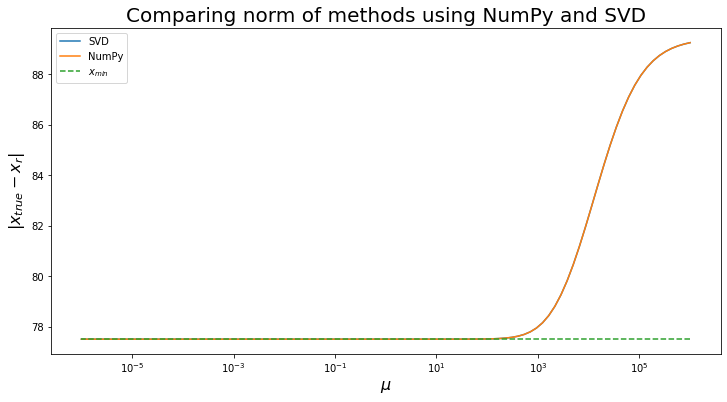

In [24]:
# We plot our resulting norms for NumPy and SVD 

plt.figure(figsize=(12,6))
plt.title("Comparing norm of methods using NumPy and SVD", fontsize = 20)
plt.xlabel("$\mu$",fontsize = 16)
plt.ylabel("$\|x_{true} - x_r\|$", fontsize = 16)
plt.plot(mu_vals_SVD,err_SVD, label = "SVD")
plt.plot(mu_vals_numpy, err_numpy, label = "NumPy")
plt.plot(mu_vals_SVD,[err_SVD[-1]]*100, "--", label = '$x_{min}$')
plt.semilogx()
plt.legend()
plt.show()

From the plot it seems that the error is smallest in the interval where $\mu \in [10^{-6},10]$, where the errors for SVD and NumPy seems to be identical. Intuitively this makes sense, as a weight means that the term $\|Ax -y\|^2$ will dominate in our $T(x)$. Since we arent as interested in minimizing the norm $\|x\|$, it makes sense that we get the smallest norm $\|x_{true} - x_r\|$ when our weight  $\mu$ is small.

## TASK 3

In this segment, we will look closer at solving the single channel source separation using learnt norm. In our application, we will use it to split a set of images into two categories; zeros and ones. Here we will import the MNIST data set, which was given as a attachment to this project. The images are stored in a matrix with values in $[0,1]$, where the columns are representative of a given image.

### 3 a)

We start by showing that a matrix $B = I - WW^T$ is a projection matrix, with $W \in{\rm I\!R}^{m \times n}$ being a matrix containing pairwise orthogonal columns and $I$ being the identity matrix. We note that if a given matrix $A$ is a projection matrix, then $A^2 = A$. Furthermore, pairwise orthogonality means that the columns $(w_1,w_2,...,w_n)$ of $W$ satisfy that $\langle w_i,w_j \rangle = 0$, for $i \neq j$.

To prove that $B$ is a projection matrix, we first look at $B^2$: <br><br>
$$
\begin{aligned}
B^2 = (I - WW^T)^2 &=(I - WW^T)(I - WW^T)  \\
&= I^2 -2WW^T + (WW^T)(WW^T) \\
&= I^2 -2WW^T + W(W^TW)W^T 
\end{aligned}
$$
<br>
 Using that $w_i^Tw_j= \langle w_i,w_j \rangle$, we write out $W^TW$ on component form.
$$
W^TW =\begin{bmatrix}w_1^T\\w_2^T\\\vdots\\w_n^T\end{bmatrix} [w_1,w_2, ... , w_n] = 
\begin{bmatrix}
\langle w_1,w_1 \rangle & \langle w_1,w_2 \rangle &\ldots& \langle w_1,w_n \rangle\\
\langle w_2,w_1 \rangle & \langle w_2,w_2 \rangle &\ldots& \langle w_2,w_n \rangle\\
\vdots & \vdots &&\vdots\\
\langle w_n,w_1 \rangle & \langle w_n,w_2 \rangle &\ldots& \langle w_n,w_n \rangle\\
\end{bmatrix}
$$ 

Knowing that the columns $(w_1,w_2,...,w_n)$ of $W$ are pairwise orthogonal, we have that $\langle w_i,w_j \rangle = 0 $ for all $ i \neq j$, and  $\langle w_i,w_j \rangle = 1 $ for $ i = j$. Thus,

$$
W^TW =\begin{bmatrix}w_1^T\\w_2^T\\\vdots\\w_n^T\end{bmatrix} [w_1,w_2, ... , w_n] = 
\begin{bmatrix}
1 & 0 &\ldots& 0\\
0 & 1 &\ldots& 0 \rangle\\
\vdots & \vdots &&\vdots\\
0 &0 &\ldots& 1\\
\end{bmatrix} = I
$$ 

Placing this into our equation for $B^2$, we get the following.<br><br>
$$
B^2 = I^2 -2WW^T + W(I)W^T = I - 2WW^T +WW^T = I -WW^T = B
$$
$$
\Rightarrow B^2 = B 
$$
<br>
Now that we have shown $B$ is a projection matrix, we want to show that it is symmetric positive semi-definite. To do this, we look at the eigenvalues $\lambda$ and eigenvectors $x$ of $B$, such that $Bx = \lambda x$:
<br>
$$
B^2x = B(Bx) = B(\lambda x) = \lambda(Bx) = \lambda^2x
$$
$$
\Rightarrow B^2x = \lambda^2x 
$$
<br>
But as we showed earlier $B$ is a projection matrix, $B^2 = B$.
Then,
<br>
$$
Bx = B^2x =  \lambda^2 x \wedge Bx = \lambda x
$$
$$
\Rightarrow \lambda^2 = \lambda \iff \lambda = 0 \vee \lambda = 1
$$
<br>
Thus, we have shown that our projection matrix $B$ (and all other projection matrices for that matter), can only have the two eigenvalues $\lambda = 0$ and $\lambda = 1$. As these eigenvalues are non-negative (but not strictly positive), we only now need to show that $B^T = B$ to prove that our $B$ is symmetric positive semi-definite, SPSD. 
$$
B^T = (I - WW^T)^T = I^T - (WW^T)^T = I - WW^T = B
$$

As shown $B^T = B$, thus we can conclude that $B$ is SPSD.

### 3 b)

For this task, we want to find the minimal norm, meaning that we want to find 
$$
\text{arg}_x min \frac{1}{2}x^TBx, \hspace{0.5cm} \text{such that}\hspace{0.2cm} Ax = y
$$
,where $A$, $B$ and $x$ are defined as
$$
A = [I\quad I] \quad B=\begin{bmatrix}B_0&0\\0&B_1\end{bmatrix},\quad B_0 = I-W_0W_0^T,\quad B_1=I-W_1W_1^T,\quad \boldsymbol{x}=\begin{bmatrix}\boldsymbol{u}\\\boldsymbol{v}\end{bmatrix} .
$$


### 1)

Similarly to **TASK 1, 1 c)**, we have a lagrange function which is defined as <br><br>
$$ 
L(x,\lambda) = x^TBx + \lambda^T(Ax - y)
$$
<br>
,which we wish to find $x$ such that the the gradient of our lagrange function is equal to zero.<br>
We start by looking at $\nabla_x L(x,\lambda)$, using our results from **TASK 1, 1 c)**:<br><br>
$$
\begin{aligned}
\nabla_x L(x,\lambda) &= \frac{d}{dx} (x^TBx) + \frac{d}{dx} (\lambda^T(Ax - y))\\
&= (\frac{1}{2}B^T +\frac{1}{2}B)x + A^T \lambda
\end{aligned}
$$

$$
\begin{aligned}
\nabla_{\lambda} L(x,\lambda) &= \frac{d}{d\lambda} (x^TBx) + \frac{d}{d\lambda} (\lambda^T(Ax - y)) = Ax-y
\end{aligned}
$$

Setting these equations to zero, we can rewrite this into a system of equations:

$$
\begin{bmatrix}\ \frac{1}{2}B^T +\frac{1}{2}B & A^T\\A&0\end{bmatrix} \begin{bmatrix}x\\ \lambda \end{bmatrix} = \begin{bmatrix}0\\ y \end{bmatrix}
$$
Here 0 are suitably sized matrices containing only 0. We now swap out $A$, $B$ and $x$ for the expressions we defined earlier, also noting that $B^T = B$, such that $\frac{1}{2}B^T +\frac{1}{2}B = B$.

$$
\begin{bmatrix}\ I-W_0W_0^T& 0& I\\ 0&I-W_1W_1^T&I\\ I&I& 0\end{bmatrix} \begin{bmatrix}u\\v\\ \lambda \end{bmatrix} = \begin{bmatrix}0\\0\\ y \end{bmatrix}
$$

### 2)

We now wish to eliminate $\lambda$ from our system of equations above. We do this by writing out our system as three equations:

$$
(I-W_0W_0^T)u + I\lambda = 0
$$

$$
(I-W_1W_1^T)v I\lambda = 0
$$

$$
u+v=y
$$

We now subtract the first equation from our second. 

$$
(I-W_1W_1^T)v + I\lambda - ((I-W_0W_0^T)u + I\lambda) = (I-W_1W_1^T)v - (I-W_0W_0^T)u = 0
$$

Rewriting our 3rd equation as $v = y-u$, we can further rewrite our system.

$$
(I-W_1W_1^T)(y-u) - (I-W_0W_0^T)u = 0
$$
$$
\Rightarrow (2I-W_0W_0^T-W_1W_1^T)u = (I-W_1W_1^T)y
$$
<br>
From our last equation, we see that it is possible to write our system of equations as $Cu = d$ with <br><br>
$$
C = (2I-W_0W_0^T-W_1W_1^T) \hspace{0.5cm}, d = (I-W_1W_1^T)y
$$
<br>
It is clear that when we have solved $Cu = d$ for $u$, we can find $v$ using that $v = y - u$

### 3)

Now that we have found the necessary equations for calculating $u$ and $v$, we now try to implement a method for solving our system using the minimal norm approach. To do this, we will use the QR-decomposition found in NumPys `numpy.linalg.qr()`, as well as the previously implemented function `QR_solver()`. The choice of using QR-decomposition as our system is quite somewhat large. All though the QR-decomposition itself is quite computationally heavy, our use of `QR_solver()` has shown to be quite fast. The reason for choosing `numpy.linalg.qr()` in favour of our own implemented `gram_schmidt()`, is because the Gram-Schmidt method is known to be numerically unstable.

In [25]:
def norm_minimizor(W0,W1, mixed):
    
    n = np.shape(W0)[0]
    
    I = np.identity(n)
    u_vals = np.zeros((n,n))
    v_vals = np.zeros((n,n))
    
    # Calculate C matrix
    C = 2*I - W0 @ W0.T - W1 @ W1.T
    
    #Find QR-decomposition of C
    Q,R = np.linalg.qr(C)
    
    # Calculate d, and then u and v for each picture in mixed
    for i,y in enumerate(mixed.T):
        d = (I -W1 @ W1.T) @ y
        
        u =  QR_solver(Q, R, d)
        u_vals[i] = u
        
        v = y - u
        v_vals[i] = v
    
    # Return u's and v's for each picture
    return u_vals, v_vals

Now that we have implemented the necessary code, we apply ut to a set of images, and look at the runtime.

In [26]:
# Import a matrix with shape (784 x 100),
# 100 columns each representing a image with 784 pixels
mixed = np.load('mixed.npy')
W0 = np.load('W0.npy')
W1 = np.load('W1.npy')

In [27]:
%%timeit -r 6 
norm_minimizor(W0,W1,mixed)

431 ms ± 17.5 ms per loop (mean ± std. dev. of 6 runs, 1 loop each)


As we can see, our developed method is we quite fast. Now we plot our $u$ and $v$ to see if this approach works for single source separation.

In [28]:
u_vals, v_vals = norm_minimizor(W0,W1,mixed)

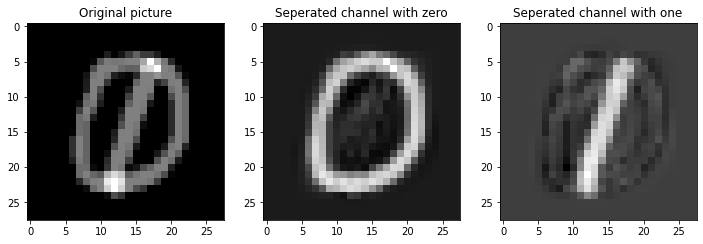

In [29]:
#Plot a picture, u and v separately

figure, (ax1,ax2,ax3) = plt.subplots(1,3)
figure.set_figheight(12)
figure.set_figwidth(12)

ax1.set_title("Original picture")
ax2.set_title("Seperated channel with zero")
ax3.set_title("Seperated channel with one")

ax1.imshow(mixed[:,1].reshape((28,28)), cmap = 'gray')
ax2.imshow(u_vals[1].reshape((28,28)), cmap = 'gray')
ax3.imshow(v_vals[1].reshape((28,28)), cmap = 'gray')


Qualitatively, it seems that we are able to separate our two channels realtively well, all though we do see some remaining "noise" in our separated images. Still, we have a reasonable argument for saying that the single source separation we have performed, has infact given a meaningful separation. However, a clear drawback in our implementation is that it is heavily dependent on knowing our bases $W_0$ and $W_1$. Without knowing these, we cant use this method.